# Assignment 6

## Try to submit as an HTML file

<font size = "5">
Print your Emory ID below

In [2]:
print("2486585")

2486585


<font size = "5">

Import the "pandas" and "matplotlib.pyplot" library

In [11]:
# Write your answer here:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<font size = "5">

(a) Compute function for each individual (map)

<font size = "3">

- Import the datset "data/bmi.csv"
    - **Note that the column `Height` is in $cm$, and `Weight` is in $kg$**
- Write a lambda function for $ BMI = \frac{weight (kg)}{height (m)^2} $
- Use ```list(map(...))``` to calculate $BMI$ for each row of the dataset
- Round the outcome into 2 decimal points
- Store the calculation in a new column in the dataframe called `BMI`
- Display the dataframe


In [67]:
# Write your own code here
bmi_data = pd.read_csv("data/bmi.csv")
bmi_fn = lambda Weight, Height: round(bmi_data["Weight"] / (bmi_data["Height"] / 100)**2, 2)


BMI = pd.DataFrame(list(map(bmi_fn, bmi_data["Weight"], bmi_data["Height"])))
display(BMI.iloc[0,:])




0      31.71
1      24.36
2      32.14
3      27.35
4      27.48
       ...  
495    68.00
496    35.74
497    68.41
498    42.22
499    43.77
Name: 0, Length: 500, dtype: float64

<font size = "5">
For questions (b)-(d), read "data/wdi_2020.csv" <br>

- This is a dataset containing the proportion  <br>
of urban population by country in 2020

<font size = "5">

(b) Convert to upper case

<font size = "3">

- Create the following function to convert a string to upper case

$\quad$ ``` fn_upper = lambda x: x.upper() ```

- Create a new column, "countryname_upper"  <br>
that converts "countryname" to upper case.

- Print the original `countryname` and the newly created column, like: <br>
"['Afghanistan', 'Africa Eastern and Southern', 'Africa Western and Central', 'Albania', 'Algeria', ......] "

In [24]:
# Write your own code here
wdi_2020 = pd.read_csv("data/wdi_2020.csv")
fn_upper = lambda x: x.upper()
wdi_2020["countryname_upper"] = wdi_2020["countryname"].apply(fn_upper)
print(wdi_2020["countryname"])
print(wdi_2020["countryname_upper"])

0                      Afghanistan
1      Africa Eastern and Southern
2       Africa Western and Central
3                          Albania
4                          Algeria
                  ...             
261             West Bank and Gaza
262                          World
263                    Yemen, Rep.
264                         Zambia
265                       Zimbabwe
Name: countryname, Length: 266, dtype: object
0                      AFGHANISTAN
1      AFRICA EASTERN AND SOUTHERN
2       AFRICA WESTERN AND CENTRAL
3                          ALBANIA
4                          ALGERIA
                  ...             
261             WEST BANK AND GAZA
262                          WORLD
263                    YEMEN, REP.
264                         ZAMBIA
265                       ZIMBABWE
Name: countryname_upper, Length: 266, dtype: object


<font size = "5">

(c) Extract sorted elements from a dataset

<font size = "3">

- Sort by "prop_urbanpopulation" in ascending order
- Subset the 5 countries with the lowest urban population

In [27]:
# Write your code here
urban = wdi_2020.sort_values(by = "prop_urbanpopulation", ascending = True)
display(urban.iloc[0:5, :])


,year,yearcode,countryname,countrycode,prop_urbanpopulation,countryname_upper
191,2020,YR2020,Papua New Guinea,PNG,13.345,PAPUA NEW GUINEA
34,2020,YR2020,Burundi,BDI,13.708,BURUNDI
141,2020,YR2020,Liechtenstein,LIE,14.416,LIECHTENSTEIN
177,2020,YR2020,Niger,NER,16.626,NIGER
149,2020,YR2020,Malawi,MWI,17.427,MALAWI


<font size = "5">

(d) Subset elements with query

<font size = "3">

- Compute the 25 quantile value of "prop_urbanpopulation"
- Use ".query()" to subset countries with <br>
 "prop_urbanpopulation" higher the 25 quantile

**hint: Import ```numpy``` and use `np.nanpercentile`**

In [48]:
# Write your own code here
twentyfive = np.nanpercentile(wdi_2020["prop_urbanpopulation"], 25)
higher = wdi_2020.query("prop_urbanpopulation > @twentyfive")
display(higher)

,year,yearcode,countryname,countrycode,prop_urbanpopulation,countryname_upper
2,2020,YR2020,Africa Western and Central,AFW,47.857831,AFRICA WESTERN AND CENTRAL
3,2020,YR2020,Albania,ALB,62.112000,ALBANIA
4,2020,YR2020,Algeria,DZA,73.733000,ALGERIA
5,2020,YR2020,American Samoa,ASM,87.153000,AMERICAN SAMOA
6,2020,YR2020,Andorra,AND,87.916000,ANDORRA
...,...,...,...,...,...,...
258,2020,YR2020,"Venezuela, RB",VEN,88.279000,"VENEZUELA, RB"
260,2020,YR2020,Virgin Islands (U.S.),VIR,95.939000,VIRGIN ISLANDS (U.S.)
261,2020,YR2020,West Bank and Gaza,PSE,76.719000,WEST BANK AND GAZA
262,2020,YR2020,World,WLD,56.063764,WORLD


<font size = "5">

(e) Plot by category

<font size = "3">

- Read "data/wdi_urban.csv"<br>
This contains data from 1980 and 2020

- Create a list with the unique values of "year"
- Create a plot with a ...
    - Histogram of "prop_urbanpopulation" <br>
    for each year
    - Set the histogram option ``` alpha = 0.5 ``` for transparency
    - All the histograms should be overlapping
    - Create a legend with the list of years
    - Label the axes and the title

What do we learn from the graph?

HINT: See the example at the end of Lecture 10


We can learn from the graph that the urbanpopuation in 2020 is larger than urbanpopulation in 1980.


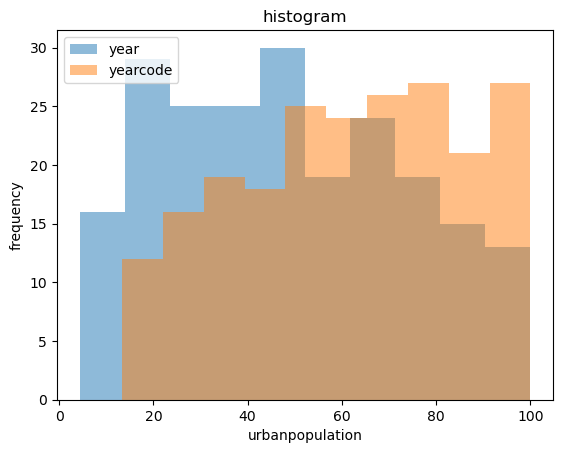

In [68]:
# Write your own code here
urban_data = pd.read_csv("data/wdi_urban.csv")
urban_unique = pd.unique(urban_data["year"])
for year in urban_unique:
    plt.hist(x= urban_data[urban_data['year'] == year]["prop_urbanpopulation"],alpha = 0.5)

plt.legend(labels = urban_data)
plt.title("histogram")
plt.xlabel("urbanpopulation")
plt.ylabel("frequency")

print("We can learn from the graph that the urbanpopuation in 2020 is larger than urbanpopulation in 1980.")